# Assigment 2 - Forecasting Electricity Prices

### Importing Libraries

In this section we will load all of the different packages needed to run the code

In [14]:
# Importing the necessary data analysis packages
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from IPython.display import Markdown as md
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pmdarima as pm
from math import sqrt
import warnings
import numpy as np
import os
import pandas as pd
import datetime as dt

warnings.filterwarnings("ignore")

Okay, Great! Now that its done, lets load in our data from our datafile. The datafile is found in the folder with Data and will be acceced through the pandas library.

In [15]:
file_P = os.path.join(os.getcwd(),'data/Elspotprices2.csv')
df_prices = pd.read_csv(file_P)
df_prices["HourUTC"] = pd.to_datetime(df_prices["HourUTC"])
df_prices = df_prices.loc[(df_prices['PriceArea']=="DK2")][["HourUTC","SpotPriceDKK"]]
df_prices = df_prices.loc[df_prices["HourUTC"].dt.year.isin([2019,2020,2021,2022,2023])]
df_prices = df_prices.reset_index(drop=True)
file_P = os.path.join(os.getcwd(),'data/ProdConData.csv')
df_data = pd.read_csv(file_P)
df_data["HourUTC"] = pd.to_datetime(df_data["HourUTC"])
df_data = df_data.loc[df_data["HourUTC"].dt.year.isin([2019,2020,2021,2022,2023])]
df_data = df_data.reset_index(drop=True)

## Lets get to the fun part!

So now I will list all the different tasks for this project to highlight what should be done (and what shouldnt?!...)

## Task 1
Develop an ARIMA model to predict electricity prices. Your goal in all following tasks is to achieve the best possible performance. In both sub-tasks report the RMSE values you achieve with your models.


### 1.1 
Use NO exogenous variables in your model and make day-ahead prediction for your testing dataset. You can use a seasonal ARIMA or FourierFeaturizer and any data transformation you want in your model, but no exogenous features from df data. Establish a suitable persistence forecast and report the RMSE values in both cases (your model and  persistence). Briefly discuss your results.

We start by deviding the data, and make a test set

Text(0, 0.5, 'Price DKK')

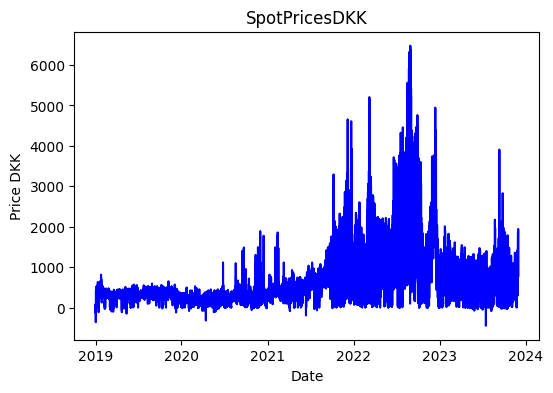

In [16]:
# We use the time intervial.
t_s_train = pd.Timestamp(dt.datetime(2019, 1, 1, 0, 0, 0))
t_e_train = pd.Timestamp(dt.datetime(2023, 11, 30, 23, 0, 0))

train = df_prices.loc[(df_prices['HourUTC'] >= t_s_train) & (df_prices['HourUTC'] <= t_e_train)]
train = train.reset_index(drop=True)

t_s_test = pd.Timestamp(dt.datetime(2023, 12, 1, 0, 0, 0))
t_e_test= pd.Timestamp(dt.datetime(2023, 12, 31, 23, 0, 0))

test = df_prices.loc[(df_prices['HourUTC'] >= t_s_test) & (df_prices['HourUTC'] <= t_e_test)]
test = test.reset_index(drop=True)

plt.figure(figsize=(6, 4), dpi=100)

plt.plot(train['HourUTC'], train['SpotPriceDKK'], label='SpotPriceDKK', color='blue'    )

plt.title('SpotPricesDKK')
plt.xlabel('Date')
plt.ylabel('Price DKK')

We will plot the two sets besides each other

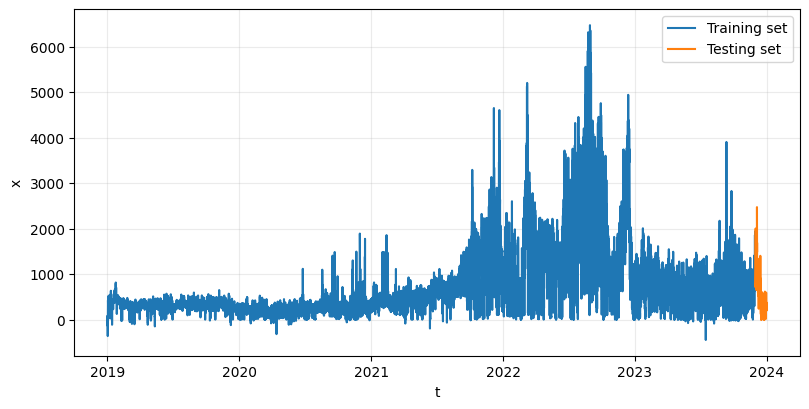

In [17]:

# Plot the result
plt.figure(figsize=(8, 4), dpi=100)

plt.plot(train['HourUTC'], train['SpotPriceDKK'])
plt.plot(test['HourUTC'], test['SpotPriceDKK'])

plt.legend(["Training set", "Testing set"])
plt.tight_layout()
plt.xlabel("t")
plt.ylabel("x")
plt.grid(alpha=0.25)
plt.show()

We will use a method that automatically fit the best model for us. We will first remove all the columns other than the numericals values for SpotPrices.

In [27]:
train_Arima = train['SpotPriceDKK']

model = pm.auto_arima(train_Arima, trace = True, seasonal = False, stepwise = True, maxiter = 10)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=546737.590, Time=5.49 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=555097.136, Time=0.53 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=549876.670, Time=0.67 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=550487.460, Time=2.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=555095.136, Time=0.35 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=548588.749, Time=5.29 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=549882.150, Time=5.17 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=546205.423, Time=7.98 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=545906.451, Time=15.02 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=549185.226, Time=4.16 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=545615.399, Time=10.56 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=548347.612, Time=4.30 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=545890.217, Time=10.33 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=545749.399, Time=15.50 sec
 

The PACF plot are done herunder.

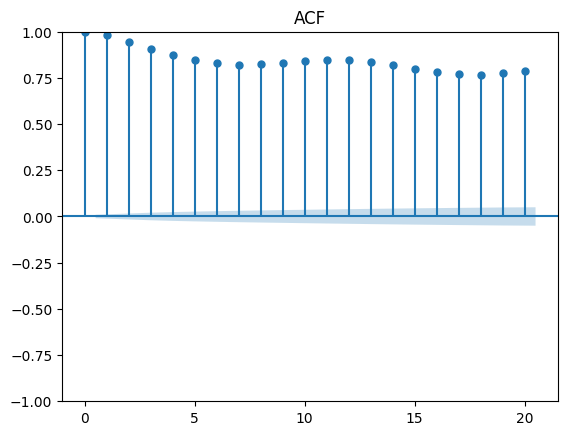

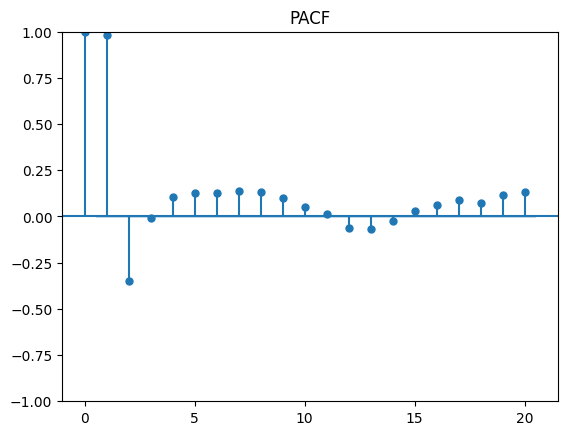

In [28]:
# Check ACF plot
pm.plot_acf(train_Arima, lags=20, title = "ACF", alpha = 0.05);
# Check the PACF plot
pm.plot_pacf(train_Arima, method='ywm', lags=20, title = "PACF", alpha = 0.05);

# Note that alpha indicates the used confidence in the correlation plots, with 95% (alpha = 0.05) being the standard one.
# You can experiment with different values of alpha
# Lags controls the number of lagged values in the plots

### 1.2
Add any exogenous variables you want (maximum 3) and repeat the process (choose/optimize
your model and evaluate it for the day-ahead prediction). What exogenous variables helped you improve the prediction and how did you choose the specific ones? Report the RMSE value and compare your results with those from task 1.1 and briefly discuss them.

### 2.1 

Her er Mads Version

In [ ]:
# Import of data manipulation / visualization libraries
import os
import pandas as pd
import numpy as np

# Import of data visualization libraries
from pylab import rcParams
import matplotlib.pyplot as plt
import seaborn as sns

# Import of data preprocessing libraries
from sklearn.preprocessing import MinMaxScaler

# Import of tensorflow libraries
from tensorflow import keras
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
# from tensorflow.keras.layers import CuDNNLSTM
from tensorflow.keras.models import Sequential

In [ ]:
# We load the spot prices
file_Path = os.path.join(os.getcwd(),'Elspotprices2.csv')
df_prices = pd.read_csv(file_Path)

# We convert the HourUTC column to datetime and set the column only at the DK2 price area
df_prices["HourUTC"] = pd.to_datetime(df_prices["HourUTC"])
df_prices = df_prices.loc[(df_prices['PriceArea']=="DK2")][["HourUTC","SpotPriceDKK"]]
df_prices = df_prices.loc[df_prices["HourUTC"].dt.year.isin([2019,2020,2021,2022,2023])]
df_prices = df_prices.reset_index(drop=True)

# We load the production and consumption data
file_Path = os.path.join(os.getcwd(),'ProdConData.csv')
df_data = pd.read_csv(file_Path)

# "e convert the HourUTC column to datetime
df_data["HourUTC"] = pd.to_datetime(df_data["HourUTC"])
df_data = df_data.loc[df_data["HourUTC"].dt.year.isin([2019,2020,2021,2022,2023])]
df_data = df_data.reset_index(drop=True)

Now we need to create a training data set from our data. Here we will be using the data for the DK2 spot price from 1/1-2019 - 30/11-2023.


In [ ]:
# We set up the starting date and the ending date for the training data
start_date = pd.to_datetime('2019-01-01 00:00:00')
end_date = pd.to_datetime('2023-11-30 23:00:00')
training_df_prices = df_prices[(df_prices['HourUTC'] >= start_date) & (df_prices['HourUTC'] <= end_date)]

# We create the new dataframe for the training data
training_data = pd.DataFrame({'DateTime': training_df_prices['HourUTC'], 'DK2Prices': training_df_prices['SpotPriceDKK']})

# We can plot the training data
training_data.plot(x='DateTime', y='DK2Prices', kind='line')
plt.xlabel('DateTime')
plt.ylabel('DK2Prices')
plt.title('Training Data')
plt.show()

In [ ]:
# We create the scaled values of the spotprices
scaler = MinMaxScaler()
# fit the format of the scaler -> convert shape from (1000, ) -> (1000, 1)
SpotPriceDKK = training_df_prices.SpotPriceDKK.values.reshape(-1, 1)
scaled_SpotPriceDKK = scaler.fit_transform(SpotPriceDKK)

seq_len = 25

# We we can define the function for splitting the data into sequences
def split_into_sequences(data, seq_len):
    n_seq = len(data) - seq_len + 1
    return np.array([data[i:(i+seq_len)] for i in range(n_seq)])

# And for splitting the data into training and test sets
def get_train_test_sets(data, seq_len, train_frac):
    sequences = split_into_sequences(data, seq_len)
    n_train = int(sequences.shape[0] * train_frac)
    x_train = sequences[:n_train, :-1, :]
    y_train = sequences[:n_train, -1, :]
    x_test = sequences[n_train:, :-1, :]
    y_test = sequences[n_train:, -1, :]
    return x_train, y_train, x_test, y_test

x_train, y_train, x_test, y_test = get_train_test_sets(scaled_SpotPriceDKK, seq_len, train_frac=0.9)

In [ ]:
# fraction of the input to drop; helps prevent overfitting
dropout = 0.2
window_size = seq_len - 1

# build a 3-layer LSTM RNN
model = keras.Sequential()

model.add(
    LSTM(window_size, return_sequences=True, 
         input_shape=(window_size, x_train.shape[-1]))
)

model.add(Dropout(rate=dropout))
# Bidirectional allows for training of sequence data forwards and backwards
model.add(
    Bidirectional(LSTM((window_size * 2), return_sequences=True)
)) 

model.add(Dropout(rate=dropout))
model.add(
    Bidirectional(LSTM(window_size, return_sequences=False))
) 

model.add(Dense(units=1))
# linear activation function: activation is proportional to the input
model.add(Activation('linear'))


batch_size = 16

model.compile(
    loss='mean_squared_error',
    optimizer='adam'
)

history = model.fit(
    x_train,
    y_train,
    epochs=1,
    batch_size=batch_size,
    shuffle=False,
    validation_split=0.05
)

In [ ]:
# Initialize an empty list to store the predicted and actual prices
predicted_prices = []
actual_prices = []

# Loop through 30 days
for _ in range(30):
    # Predict the prices for the next 24 hours
    y_pred = model.predict(x_test[:24])
    
    # Invert the scaler to get the absolute price data
    y_test_orig = scaler.inverse_transform(y_test[:24])
    y_pred_orig = scaler.inverse_transform(y_pred)
    
    # Append the predicted and actual prices to the respective lists
    predicted_prices.append(y_pred_orig)
    actual_prices.append(y_test_orig)
    
    # Update x_test for the next 24 hours prediction
    x_test = np.concatenate([x_test[24:], y_pred.reshape(1, 24, 1)], axis=0)
    y_test = np.concatenate([y_test[24:], y_test[:24]], axis=0)

# Plot the predicted and actual prices for 30 days
plt.figure(figsize=(12, 6))
for i in range(30):
    plt.plot(np.arange(i*24, (i+1)*24), actual_prices[i], color='orange', linewidth=0.5)
    plt.plot(np.arange(i*24, (i+1)*24), predicted_prices[i], color='green', linewidth=0.5)

plt.title('SpotPriceDKK Hourly Prices Predicted 24 at a time for 30 days')
plt.xlabel('Hours')
plt.ylabel('Price (DKK/MWh)')
plt.legend(['Actual Price', 'Predicted Price'])
plt.show()